In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = "../../data/prélèvements/donnees_sandra/SynthèseSLanini_data_Prelevements_1987-2018.xlsx" # relative path to excel file
a = pd.read_excel(data,header=2) # use panda to create a database from the excel file
a.head()

,NUM_OUV_AERMC,IDENTIFIANT_BSS_2017,LIBELLE_OUVRAGE,USAGES,NAPPE_CAPTEE,X_L93,Y_L93,PROFONDEUR_(m),VOL_1987,VOL_1988,...,QUALITE_(RE)LOCALISATION,CORRECTION_LOCALISATION,CODE_INSEE,NOM_COM_OUVRAGE,SECTEUR_EVP,#_HYDRIAD,REFERENCE_BSS,CODE_NATIONAL_ARS,CODE_CH-AGRI,REMARQUES_BD
0,166008002.0,BSS002MUWQ,DRAIN AEP PONT DU TECH,AEP COLLECTIF,QUATERNAIRE,698700.629000,6.165002e+06,NaN,1847600.0,921400.0,...,BONNE (<50m),True,66008.0,ARGELES-SUR-MER,Bordure Côtière Sud,2970.0,10972X0150/DTECH,66000965.0,NaN,VOLUME 2010. Ancien doublon avec le #2687 => s...
1,166015003.0,BSS002MUAG,FORAGE AEP F2 BANYULS DELS APRES,AEP COLLECTIF,QUATERNAIRE,689767.462946,6.161253e+06,15.0,NaN,NaN,...,BONNE (<50m),False,66015.0,BANYULS-DELS-ASPRES,Vallée du Tech,92.0,10968X0066/AEP,66000112.0,NaN,Terrain stagiaire 2011 - AMBIGUITE SUR LE CODE...
2,166021003.0,BSS002MQWH,PUITS DANS NAPPE PRES DES VIGNES,AEP COLLECTIF,QUATERNAIRE,694106.477634,6.181531e+06,11.0,NaN,NaN,...,BONNE (<50m),False,66021.0,BOMPAS,Vallée de la Têt,39.0,10915X0171/F,66000122.0,NaN,Estimation des volumes autorisés via les volum...
3,166023001.0,BSS002MSTH,FORAGE AEP F2,AEP COLLECTIF,QUATERNAIRE,666373.796000,6.172867e+06,21.7,140400.0,149800.0,...,BONNE (<50m),True,66023.0,BOULETERNERE,Vallée de la Têt,109.0,10961X0012/F2,66000685.0,NaN,Volume prélevé en 2011 : 338 000 m3
4,166024003.0,BSS002MUAJ,LO SIECRET / PUITS DANS NAPPE LIEU-DIT LES CLA...,AEP COLLECTIF,QUATERNAIRE,685014.465743,6.157746e+06,10.0,557800.0,593200.0,...,NaN,False,66024.0,LE BOULOU,Vallée du Tech,91.0,10968X0069/SIECRE,66000131.0,NaN,NaN


Text(0, 0.5, 'Volumes annuels [m$^3$]')

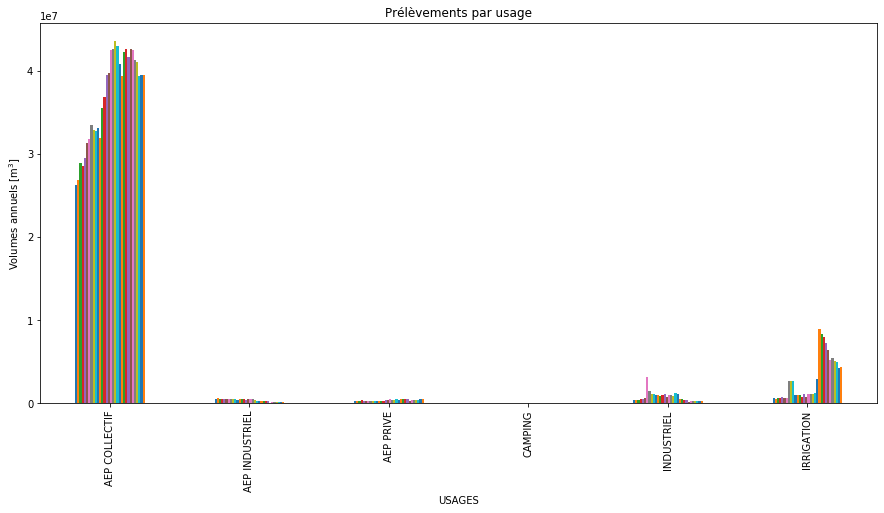

In [3]:
fig,ax = plt.subplots(figsize=(15,7)) # create a fig and ax
B = a.groupby(["USAGES"]).sum().loc[:,"VOL_1987":"VOL_2018"] # group data by the usage column and keep only Volume from 1987 to 2018
B.drop(B.index[B.sum(1) == 0]).plot(kind="bar",ax=ax,legend=[],title=("Prélèvements par usage")) # plot
plt.ylabel("Volumes annuels [m$^3$]")

Text(0, 0.5, 'Volume annuel [m$^3$]')

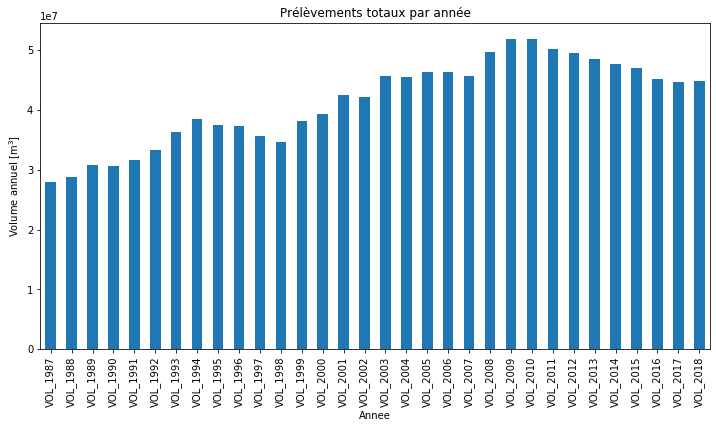

In [4]:
fig = plt.figure(figsize=(12,6))
a.loc[:,"VOL_1987":"VOL_2018"].sum().plot(kind="bar") # sum volume by year
plt.title("Prélèvements totaux par année")
plt.xlabel("Annee")
plt.ylabel("Volume annuel [m$^3$]")